In [190]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score, precision_score, recall_score,f1_score
from sklearn.metrics import make_scorer, accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [191]:
data=pd.read_csv("HW4-data-fedPapers85.csv")
data.head(15)

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
0,dispt,dispt_fed_49.txt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,...,0.009,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.000
1,dispt,dispt_fed_50.txt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,...,0.051,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.000
2,dispt,dispt_fed_51.txt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,...,0.008,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.000
3,dispt,dispt_fed_52.txt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,...,0.087,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.000
4,dispt,dispt_fed_53.txt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,...,0.027,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.000
5,dispt,dispt_fed_54.txt,0.245,0.059,0.007,0.067,0.282,0.052,0.111,0.252,...,0.007,0.030,0.015,0.037,0.186,0.045,0.111,0.089,0.037,0.000
6,dispt,dispt_fed_55.txt,0.349,0.036,0.007,0.029,0.335,0.058,0.087,0.073,...,0.015,0.029,0.015,0.007,0.211,0.022,0.145,0.073,0.073,0.000
7,dispt,dispt_fed_56.txt,0.414,0.083,0.009,0.018,0.478,0.046,0.110,0.074,...,0.018,0.009,0.009,0.000,0.175,0.018,0.267,0.129,0.037,0.000
8,dispt,dispt_fed_57.txt,0.248,0.040,0.007,0.040,0.356,0.034,0.154,0.161,...,0.027,0.007,0.020,0.020,0.201,0.040,0.154,0.027,0.040,0.000
9,dispt,dispt_fed_62.txt,0.442,0.062,0.006,0.075,0.423,0.037,0.093,0.100,...,0.000,0.000,0.025,0.012,0.199,0.031,0.106,0.081,0.031,0.000


In [192]:
data['author'].value_counts()
#These 11 papers need to be in test file to get predictions

Hamilton    51
Madison     15
dispt       11
Jay          5
HM           3
Name: author, dtype: int64

In [193]:
#Factorize all the authors
data['author'], mapping = data['author'].factorize()
data['author']

0     0
1     0
2     0
3     0
4     0
     ..
80    4
81    4
82    4
83    4
84    4
Name: author, Length: 85, dtype: int64

In [194]:
#drop columns - filename
data_drop = data.drop(['filename'], axis=1).columns
data_drop = pd.DataFrame(data, columns=data[data_drop].columns)
data_drop.head(5)

,author,a,all,also,an,and,any,are,as,at,...,was,were,what,when,which,who,will,with,would,your
0,0,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,0.017,...,0.009,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0
1,0,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,0.114,...,0.051,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0
2,0,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,0.023,...,0.008,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0
3,0,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,0.056,...,0.087,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0
4,0,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,0.013,...,0.027,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0


In [195]:
data_drop.columns[1:]

Index(['a', 'all', 'also', 'an', 'and', 'any', 'are', 'as', 'at', 'be', 'been',
       'but', 'by', 'can', 'do', 'down', 'even', 'every', 'for', 'from', 'had',
       'has', 'have', 'her', 'his', 'if', 'in', 'into', 'is', 'it', 'its',
       'may', 'more', 'must', 'my', 'no', 'not', 'now', 'of', 'on', 'one',
       'only', 'or', 'our', 'shall', 'should', 'so', 'some', 'such', 'than',
       'that', 'the', 'their', 'then', 'there', 'things', 'this', 'to', 'up',
       'upon', 'was', 'were', 'what', 'when', 'which', 'who', 'will', 'with',
       'would', 'your'],
      dtype='object')

In [196]:
data_drop.columns[0]

'author'

In [197]:
X.head(5)


,a,all,also,an,and,any,are,as,at,be,...,was,were,what,when,which,who,will,with,would,your
11,0.213,0.083,0.000,0.083,0.343,0.056,0.111,0.093,0.065,0.315,...,0.000,0.000,0.000,0.009,0.158,0.074,0.222,0.046,0.019,0.074
12,0.369,0.070,0.006,0.076,0.411,0.023,0.053,0.117,0.065,0.258,...,0.000,0.012,0.012,0.012,0.147,0.029,0.094,0.129,0.270,0.000
13,0.305,0.047,0.007,0.068,0.386,0.047,0.102,0.108,0.088,0.271,...,0.000,0.000,0.007,0.000,0.156,0.007,0.074,0.122,0.149,0.000
14,0.391,0.045,0.015,0.030,0.270,0.045,0.060,0.090,0.015,0.376,...,0.000,0.000,0.000,0.045,0.165,0.045,0.135,0.150,0.210,0.000
15,0.327,0.096,0.000,0.086,0.356,0.014,0.086,0.072,0.115,0.211,...,0.014,0.038,0.014,0.019,0.264,0.029,0.091,0.086,0.062,0.010


In [198]:
y.head(5)

11    1
12    1
13    1
14    1
15    1
Name: author, dtype: int64

In [201]:
#split the data to train test

X = data_drop.iloc[11:,1:]
y = data_drop.iloc[11:,0]
to_predict_data = data_drop.iloc[:11,1:]

In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [204]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [1]
Test score: 0.63


In [221]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.95


In [207]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_tree)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[12  0  0  0]
 [ 0  1  0  0]
 [ 0  0  0  3]
 [ 0  0  0  3]]


In [212]:
print("f1 score tree for >50K: {:.2f}".format(f1_score(y_test, pred_tree,average="weighted")))

f1 score tree for >50K: 0.79


In [214]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_tree
                            ))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         3
           4       0.50      1.00      0.67         3

    accuracy                           0.84        19
   macro avg       0.62      0.75      0.67        19
weighted avg       0.76      0.84      0.79        19



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [224]:
from sklearn.metrics import roc_curve
pred_tree_prob = tree.predict_proba(X_test)

pred_tree_prob

array([[1.        , 0.        , 0.        , 0.        ],
       [0.33333333, 0.        , 0.66666667, 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.14285714, 0.        , 0.85714286],
       [0.33333333, 0.        , 0.66666667, 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.33333333, 0.        , 0.66666667, 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.14285714, 0.        , 0.85714286],
       [1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.14285714, 0.        , 0.85714286],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        ,

In [219]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

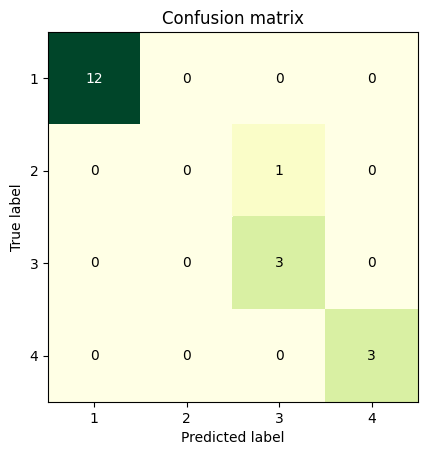

In [223]:
scores_image = heatmap(
    confusion_matrix(y_test, pred_tree), xlabel='Predicted label',
    ylabel='True label', xticklabels=tree.classes_,
    yticklabels=tree.classes_, cmap="YlGn", fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [226]:
print(classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.00      0.00      0.00         1
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         3

    accuracy                           0.95        19
   macro avg       0.69      0.75      0.71        19
weighted avg       0.91      0.95      0.92        19



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [200]:
#Build classification model - Iteration 1
tree_clf = DecisionTreeClassifier(min_samples_leaf=4,max_depth=4,random_state=42)
tree_clf.fit(X, y)
print("Accuracy:",metrics.accuracy_score(y, tree_clf.predict(X)))

Accuracy: 0.9864864864864865


In [167]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=data_drop.columns[1:],
        class_names=data_drop.columns[0],
        rounded=True,
        filled=True
    )

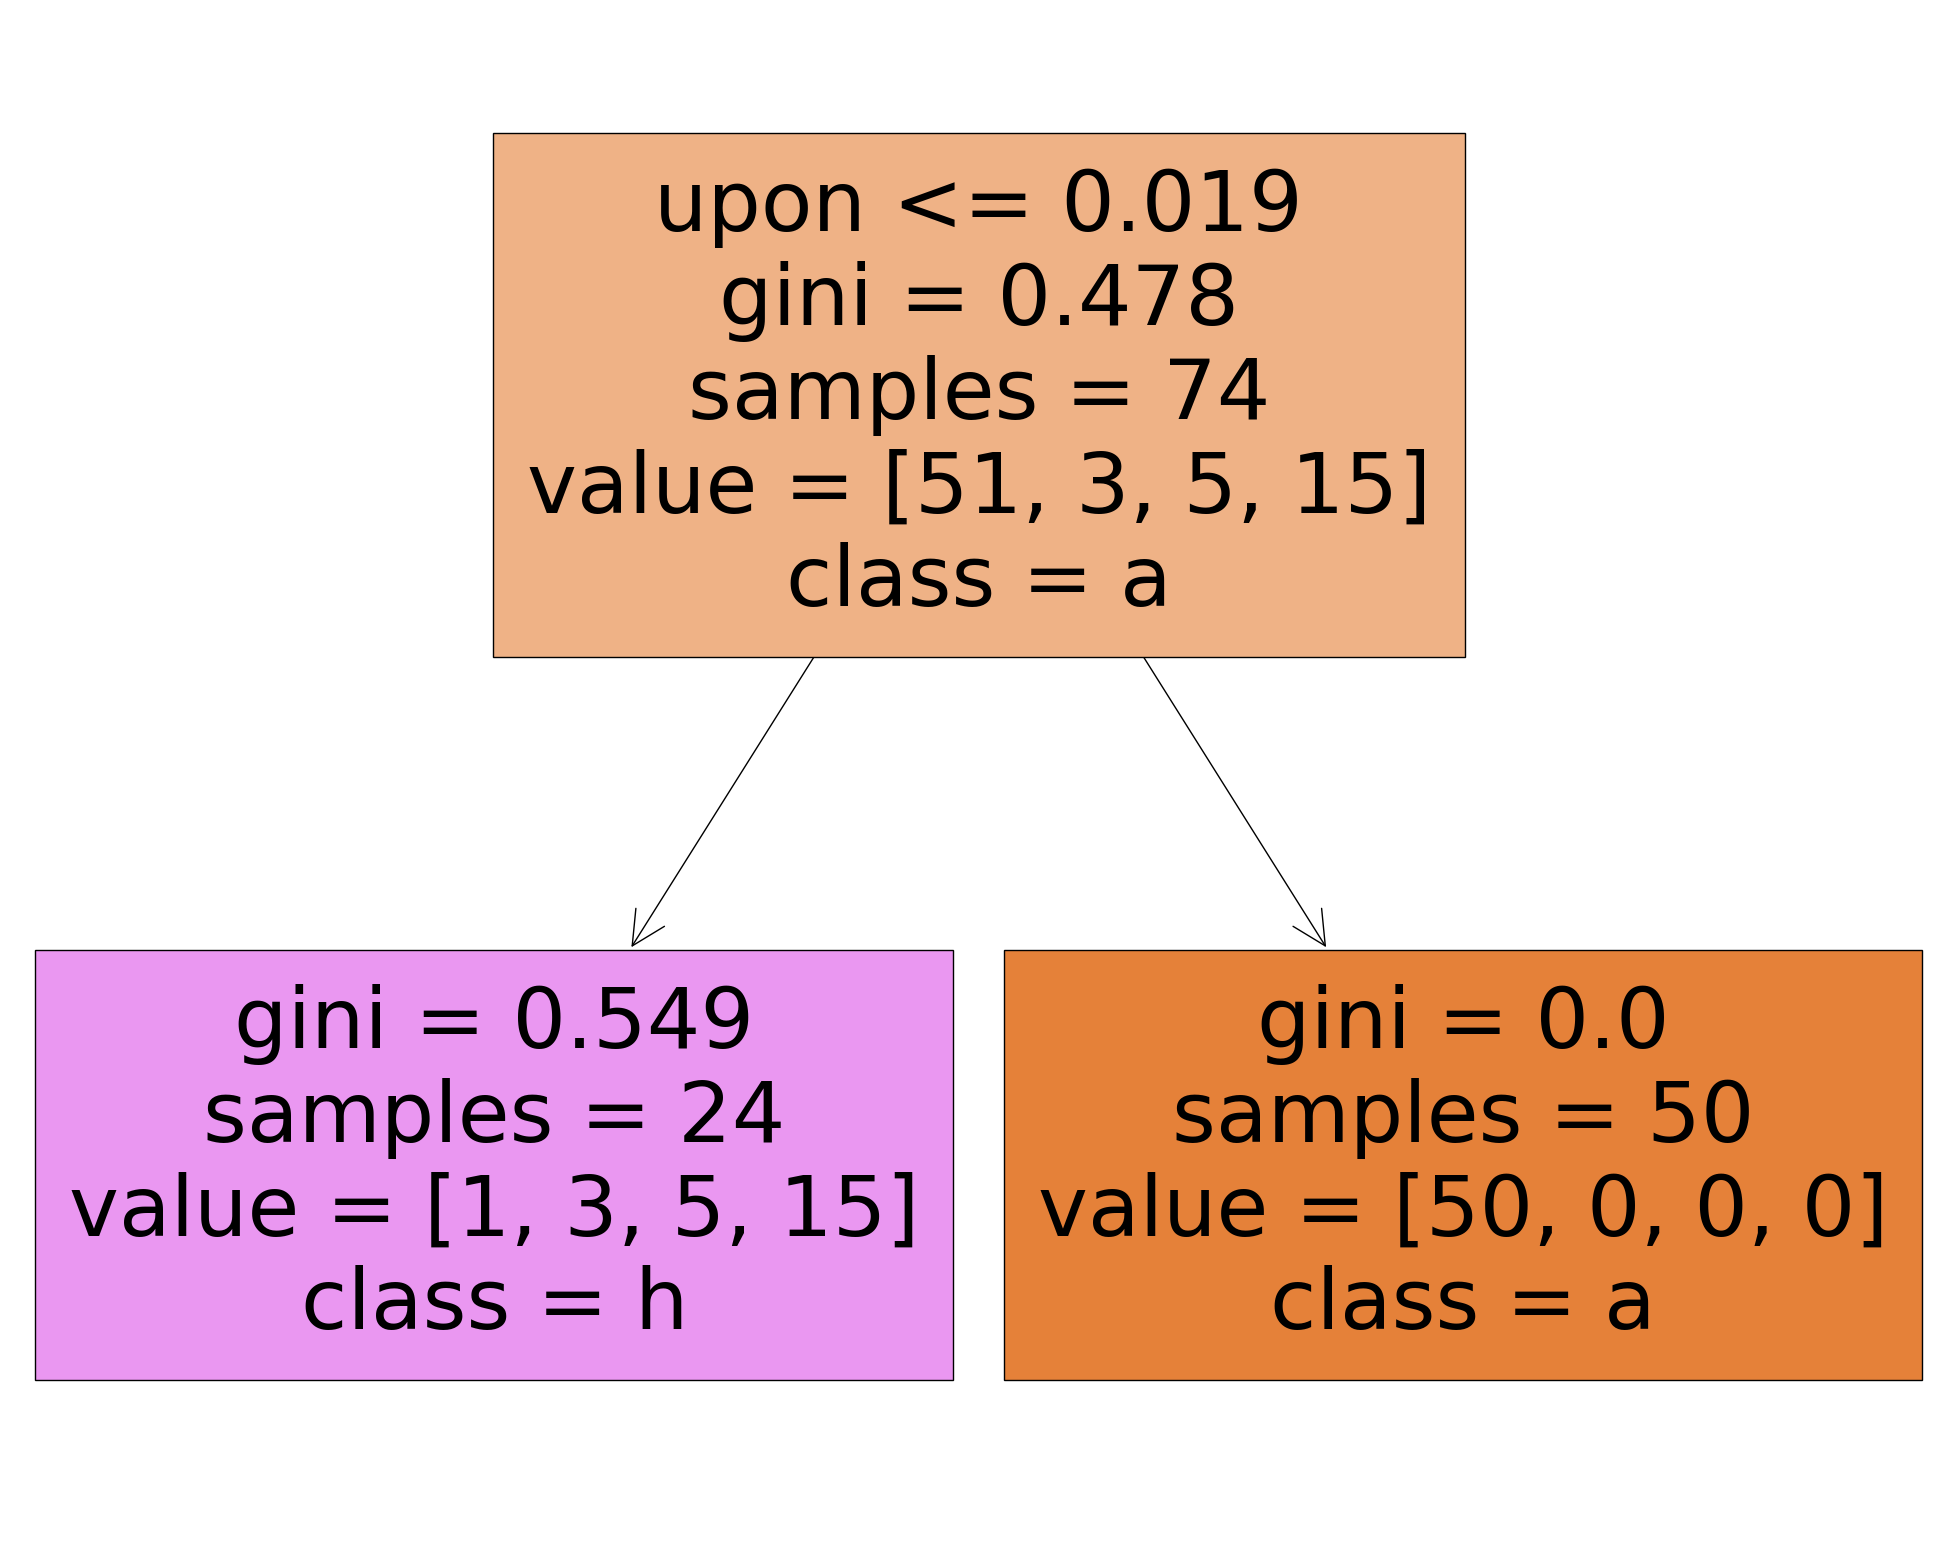

In [168]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf,
                   feature_names=data_drop.columns[1:],
                   class_names=data_drop.columns[0],
                   filled=True)

In [169]:
tree_clf.predict_proba(to_predict_data)

array([[0.04166667, 0.125     , 0.20833333, 0.625     ],
       [0.04166667, 0.125     , 0.20833333, 0.625     ],
       [0.04166667, 0.125     , 0.20833333, 0.625     ],
       [0.04166667, 0.125     , 0.20833333, 0.625     ],
       [0.04166667, 0.125     , 0.20833333, 0.625     ],
       [0.04166667, 0.125     , 0.20833333, 0.625     ],
       [0.04166667, 0.125     , 0.20833333, 0.625     ],
       [0.04166667, 0.125     , 0.20833333, 0.625     ],
       [0.04166667, 0.125     , 0.20833333, 0.625     ],
       [0.04166667, 0.125     , 0.20833333, 0.625     ],
       [0.04166667, 0.125     , 0.20833333, 0.625     ]])

In [170]:
tree_clf.predict(to_predict_data)
#It is indicating that the disputed papers were written by Hamilton-Madison both.

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [26]:
#Build classification model - Iteration 2
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
tree_clf2.fit(X, y)
print("Accuracy:",metrics.accuracy_score(y, tree_clf2.predict(X)))

Accuracy: 0.9864864864864865


In [27]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf2,
        out_file="iris_tree.dot",
        feature_names=data_drop.columns[1:],
        class_names=data_drop.columns[0],
        rounded=True,
        filled=True
    )

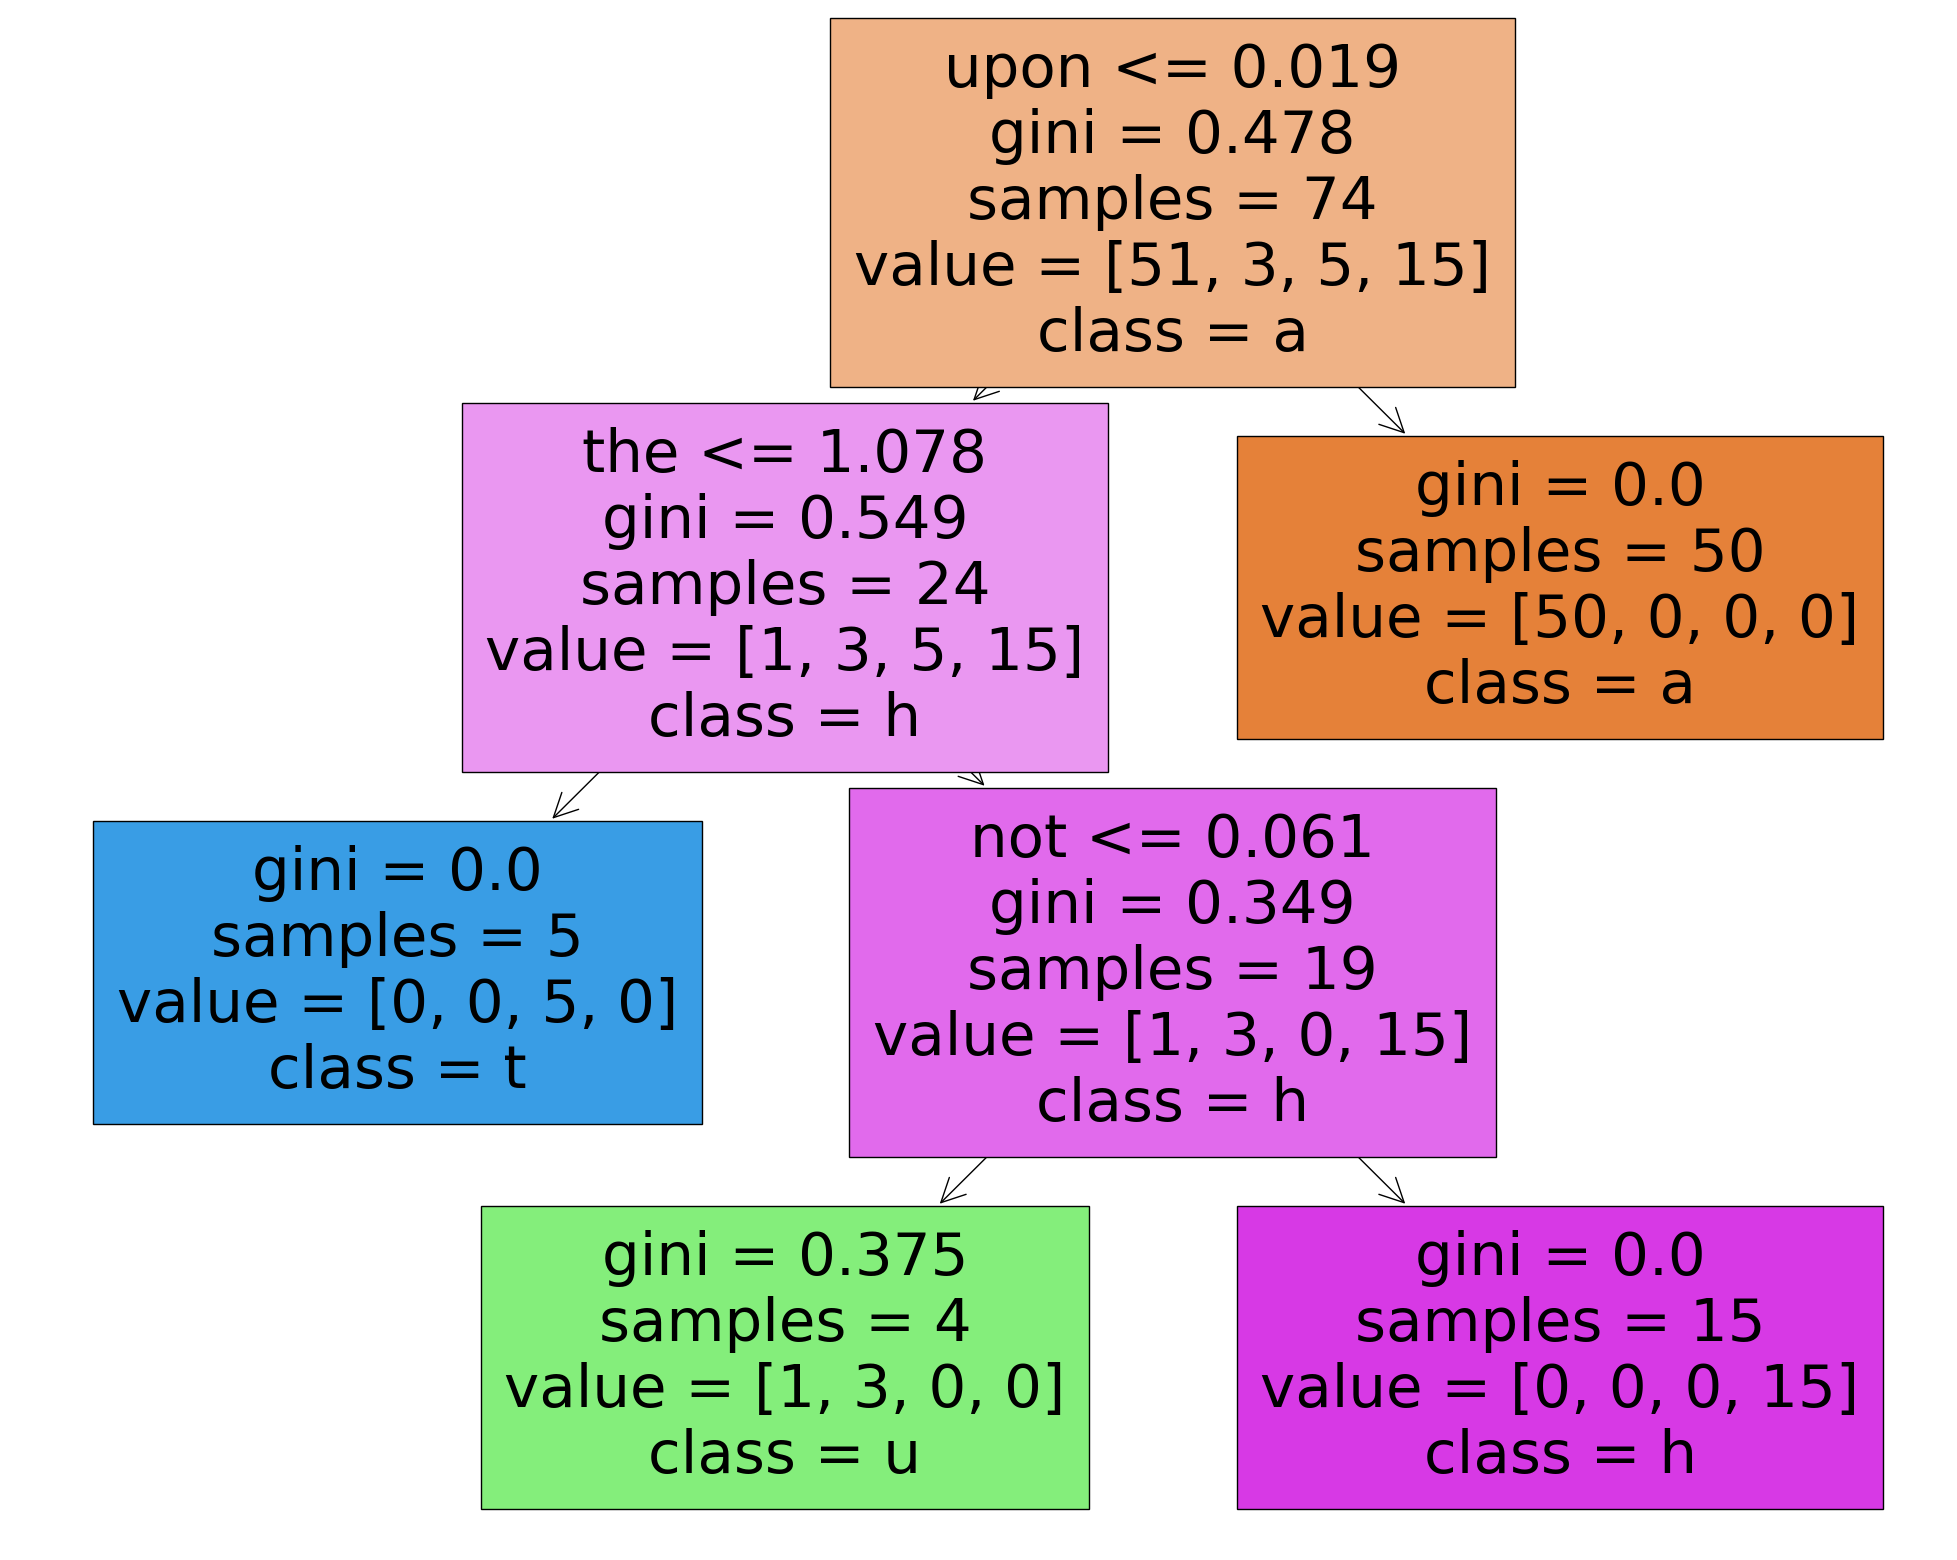

In [28]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf2,
                   feature_names=data_drop.columns[1:],
                   class_names=data_drop.columns[0],
                   filled=True)

In [29]:
tree_clf2.predict_proba(to_predict_data)

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [30]:
tree_clf2.predict(to_predict_data)
#It is indicating that the disputed papers were written by Hamilton-Madison both.

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [45]:
#Build classification model - Iteration 2
tree_clf3 = DecisionTreeClassifier(min_samples_leaf=1,max_depth=1, random_state=42)
tree_clf3.fit(X, y)
print("Accuracy:",metrics.accuracy_score(y, tree_clf2.predict(X)))

Accuracy: 0.9864864864864865


In [39]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf3,
        out_file="iris_tree.dot",
        feature_names=data_drop.columns[1:],
        class_names=data_drop.columns[0],
        rounded=True,
        filled=True
    )

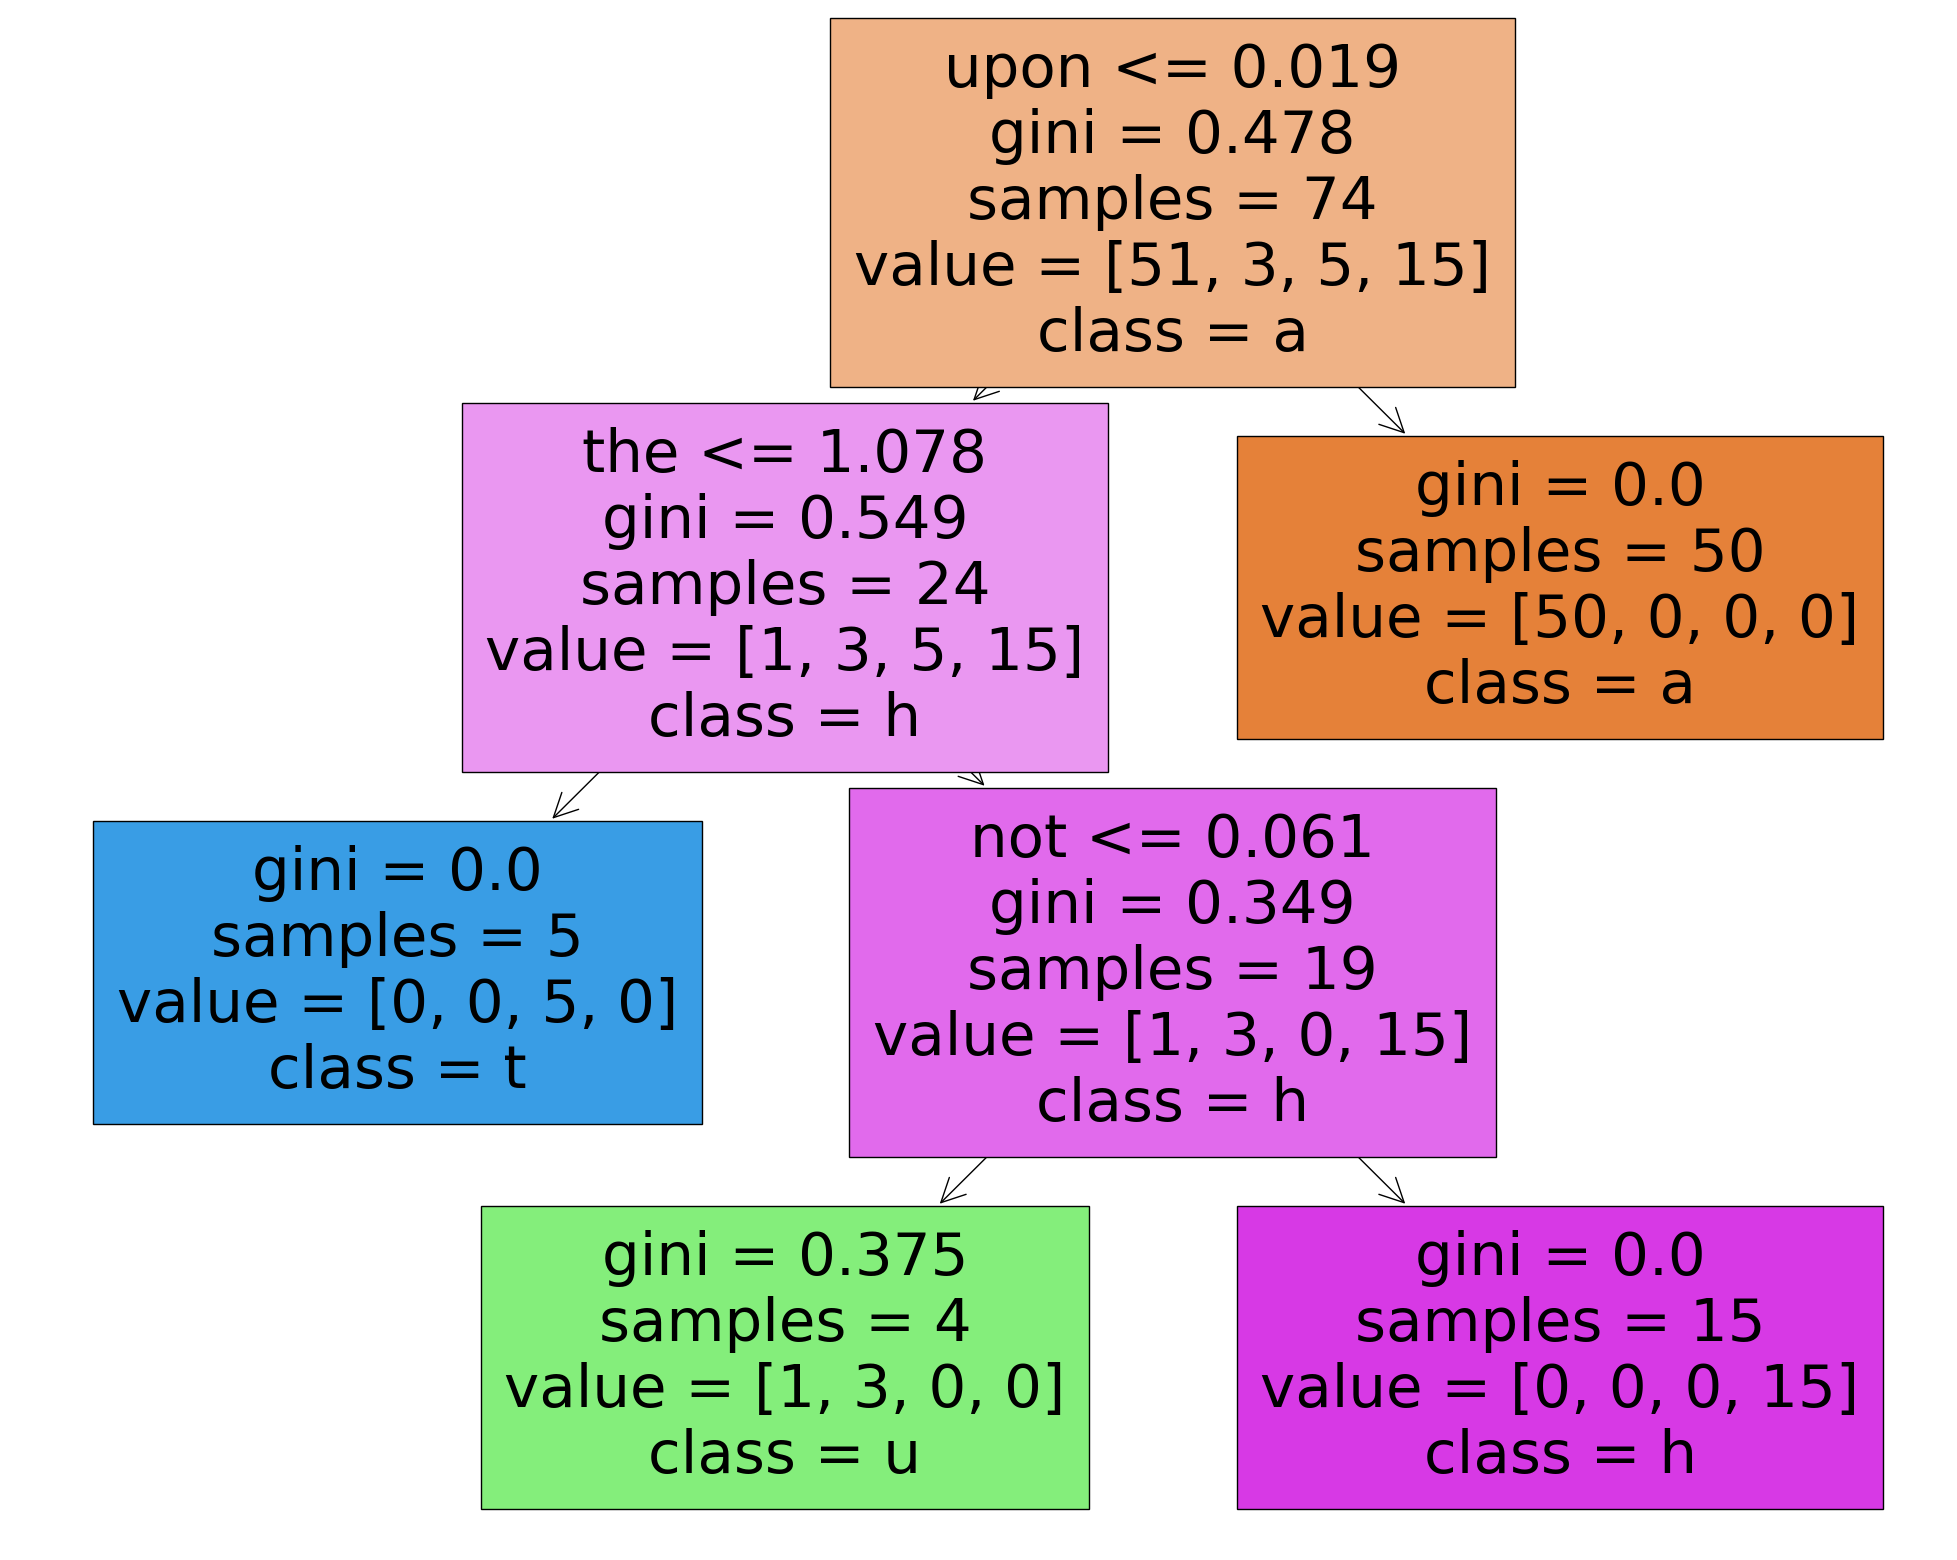

In [40]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf3,
                   feature_names=data_drop.columns[1:],
                   class_names=data_drop.columns[0],
                   filled=True)

In [41]:
tree_clf3.predict_proba(to_predict_data)

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [42]:
tree_clf3.predict(to_predict_data)
#It is indicating that the disputed papers were written by Hamilton-Madison both.

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [176]:
#using cross validation:

tree_clf4 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
tree_scores = cross_val_score(tree_clf4, X, y, scoring="accuracy",cv=4)

print("Cross-validation scores: {}".format(tree_scores))

Cross-validation scores: [0.68421053 0.89473684 0.94444444 0.88888889]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


In [177]:
print("Average cross-validation score: {:.2f}".format(tree_scores.mean()))

Average cross-validation score: 0.85


In [178]:
from sklearn.model_selection import cross_validate

tree_res = cross_validate(tree_clf4, X, y, cv=4,
                     return_train_score=True)
tree_res_df = pd.DataFrame(tree_res)
display(tree_res_df)
print("Mean times and scores:\n", tree_res_df.mean())

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


,fit_time,score_time,test_score,train_score
0,0.003528,0.001529,0.684211,0.963636
1,0.002273,0.001136,0.894737,0.945455
2,0.002089,0.000939,0.944444,0.928571
3,0.001457,0.000744,0.888889,0.946429


Mean times and scores:
 fit_time       0.002337
score_time     0.001087
test_score     0.853070
train_score    0.946023
dtype: float64


In [179]:
tree_clf4.fit(X, y)
print("Accuracy:",metrics.accuracy_score(y, tree_clf2.predict(X)))

Accuracy: 0.9864864864864865


In [180]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf4,
        out_file="iris_tree.dot",
        feature_names=data_drop.columns[1:],
        class_names=data_drop.columns[0],
        rounded=True,
        filled=True
    )

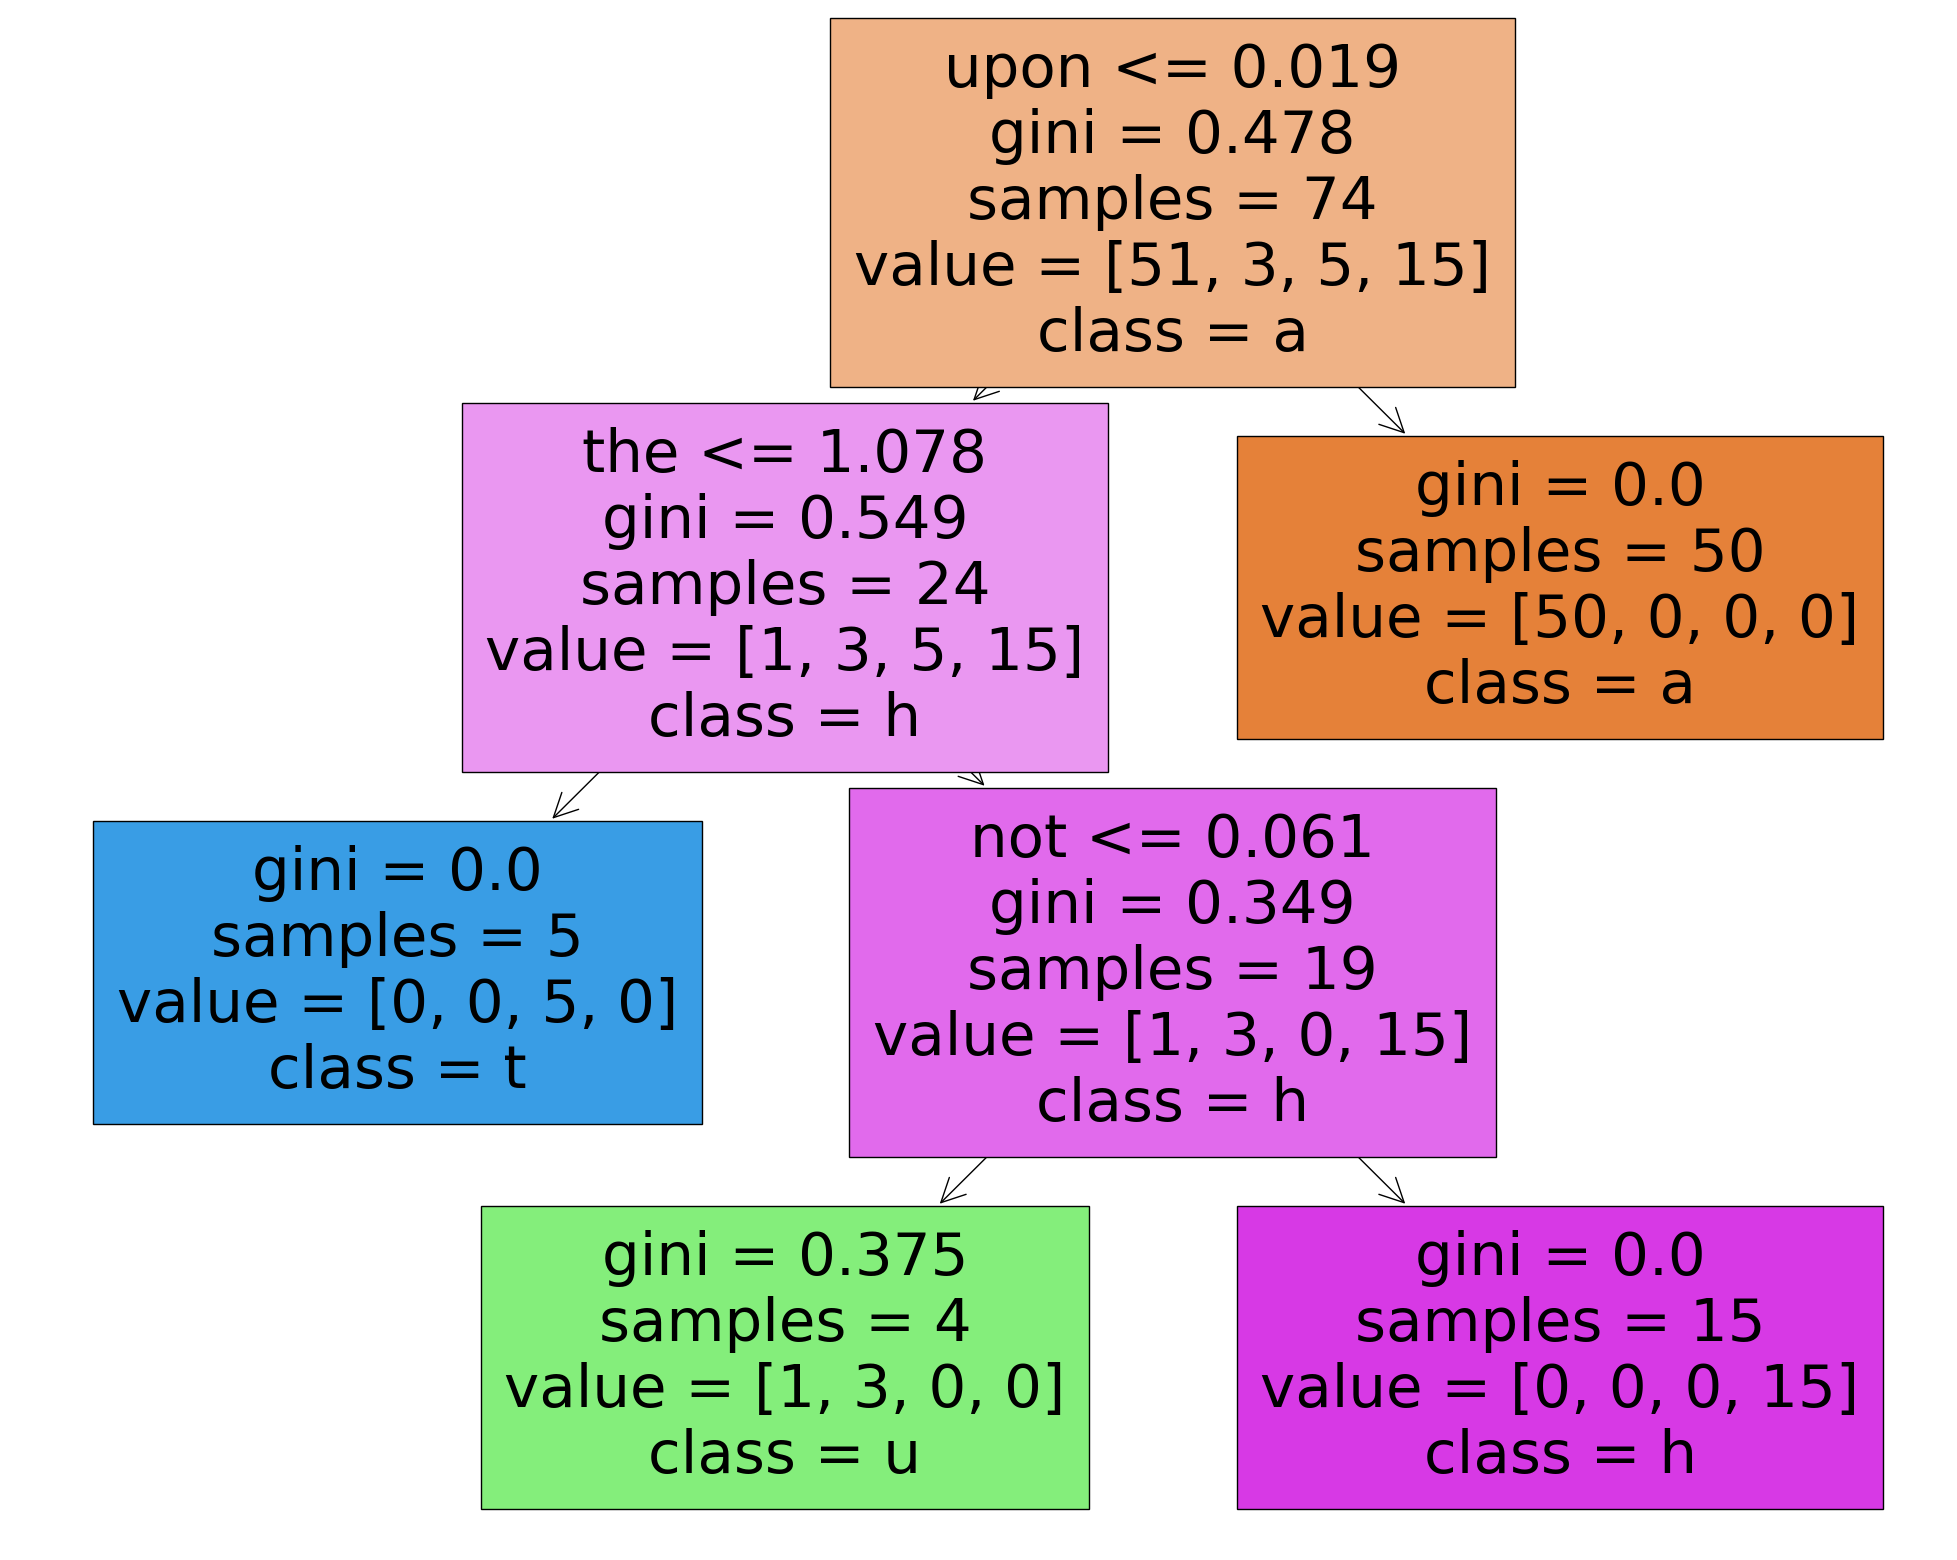

In [181]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf2,
                   feature_names=data_drop.columns[1:],
                   class_names=data_drop.columns[0],
                   filled=True)

In [182]:
tree_clf4.predict_proba(to_predict_data)

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [183]:
tree_clf4.predict(to_predict_data)
#It is indicating that the disputed papers were written by Hamilton-Madison both.

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [184]:
#startified cv
from sklearn.model_selection import StratifiedKFold
tree_clf5 = DecisionTreeClassifier(max_depth=2, random_state=42)
skf = StratifiedKFold(n_splits=4)
tree_scores = cross_val_score(tree_clf5, X, y, scoring="accuracy", cv=skf)
print("Average cross-validation score: {:.2f}".format(tree_scores.mean()))

Average cross-validation score: 0.87


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


In [185]:
tree_clf5.fit(X, y)
print("Accuracy:",metrics.accuracy_score(y, tree_clf5.predict(X)))

Accuracy: 0.9459459459459459


In [186]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf5,
        out_file="iris_tree.dot",
        feature_names=data_drop.columns[1:],
        class_names=data_drop.columns[0],
        rounded=True,
        filled=True
    )

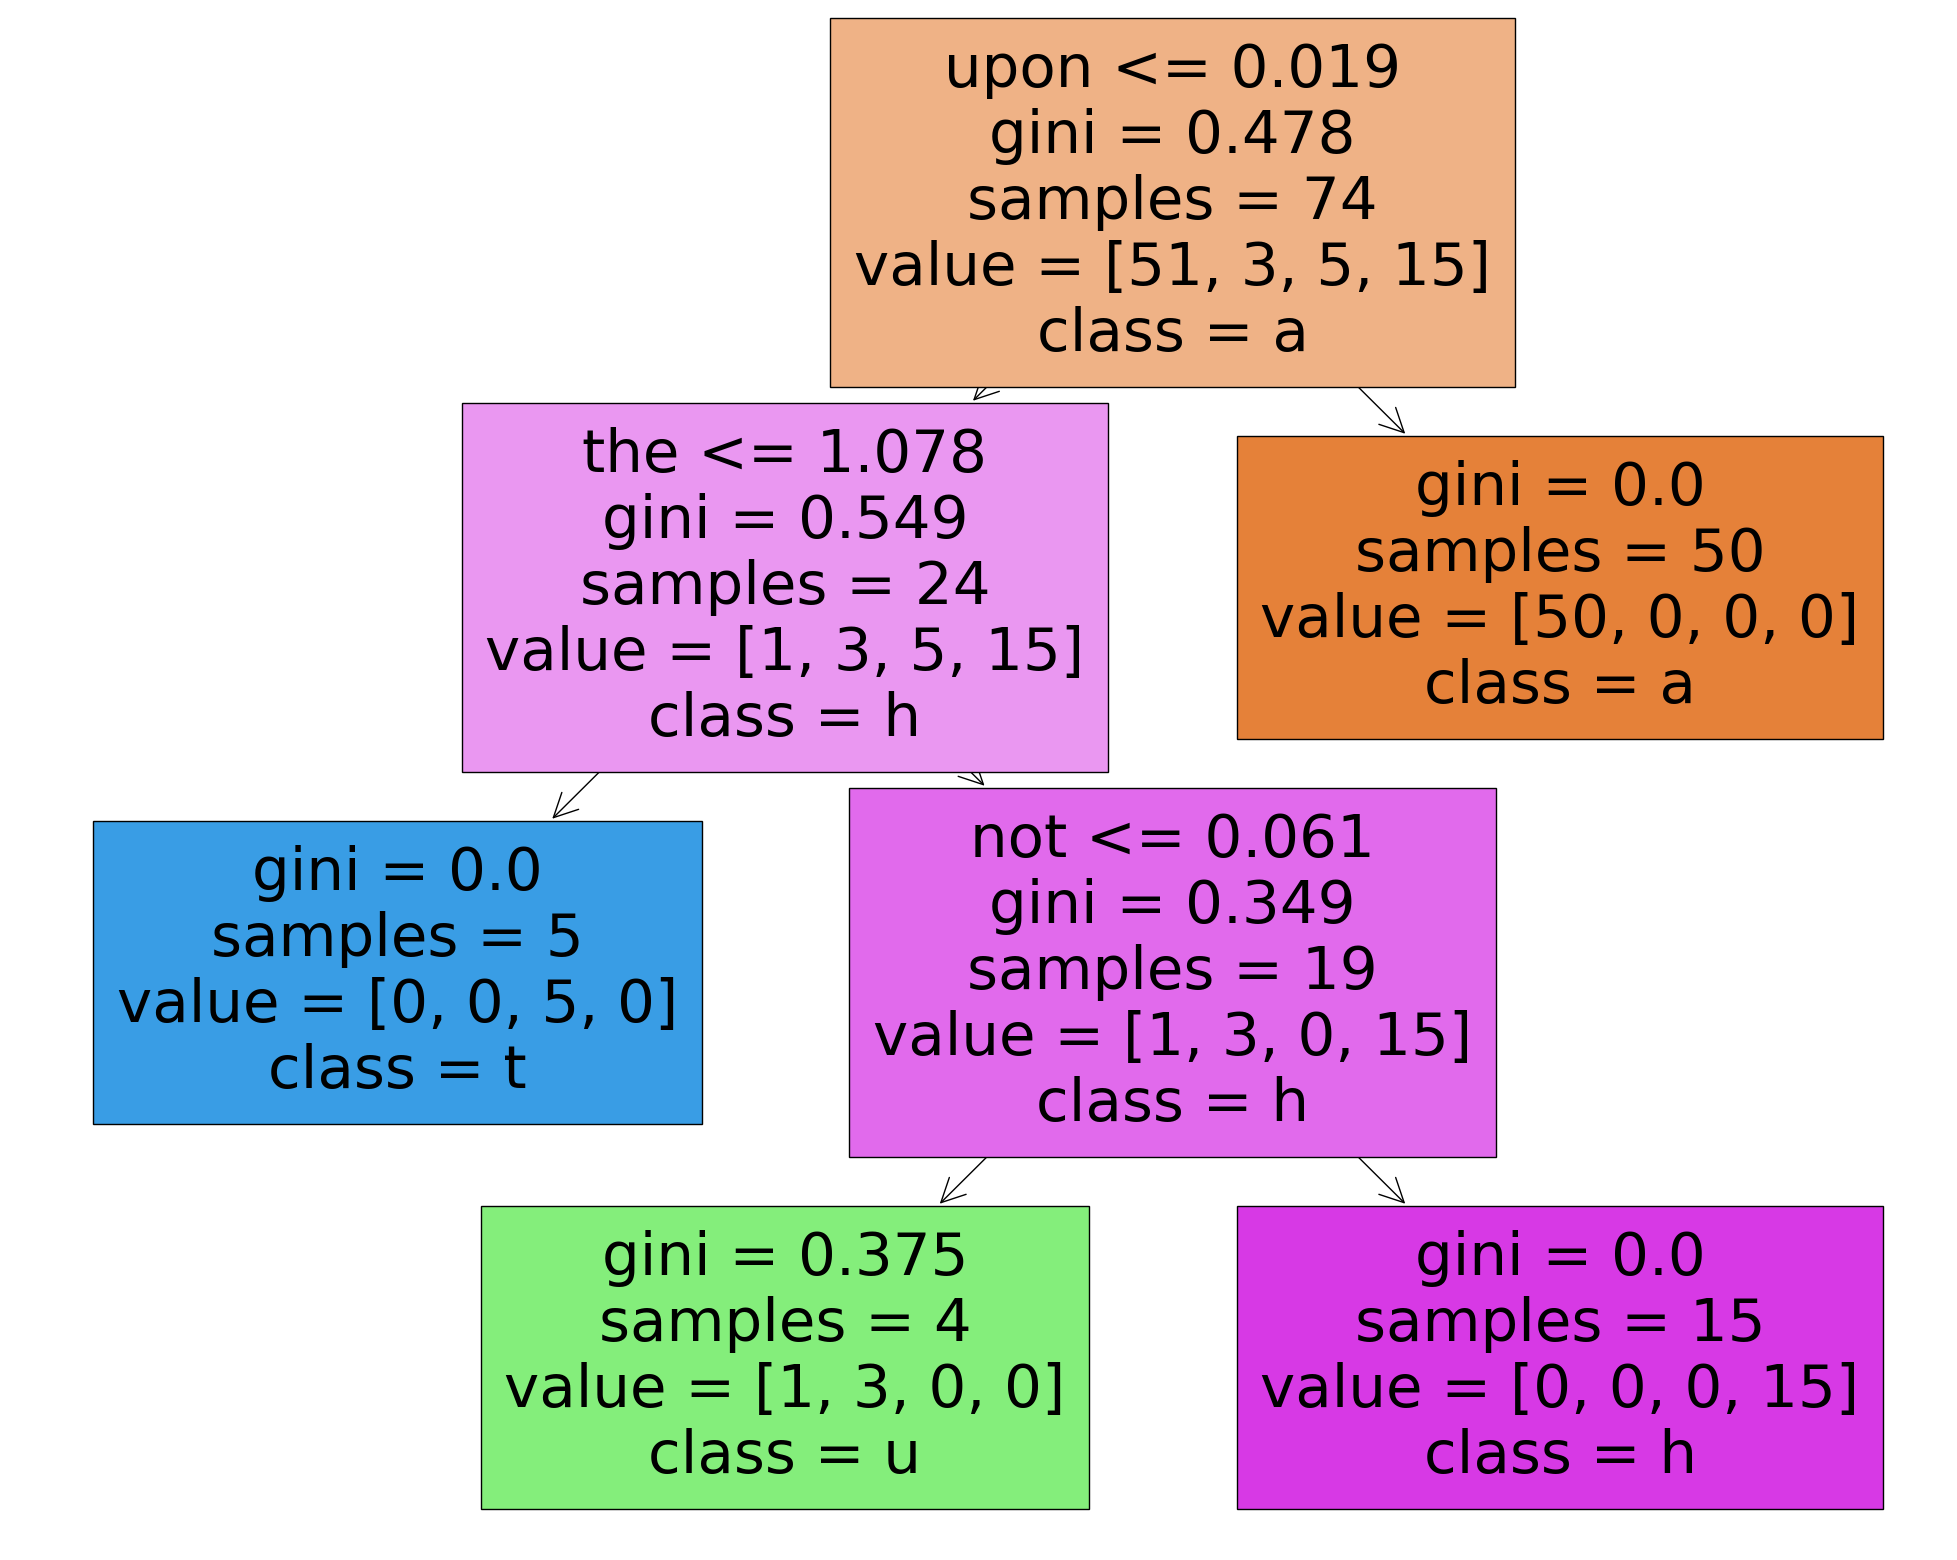

In [187]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf2,
                   feature_names=data_drop.columns[1:],
                   class_names=data_drop.columns[0],
                   filled=True)

In [188]:
tree_clf5.predict_proba(to_predict_data)

array([[0.05263158, 0.15789474, 0.        , 0.78947368],
       [0.05263158, 0.15789474, 0.        , 0.78947368],
       [0.05263158, 0.15789474, 0.        , 0.78947368],
       [0.05263158, 0.15789474, 0.        , 0.78947368],
       [0.05263158, 0.15789474, 0.        , 0.78947368],
       [0.05263158, 0.15789474, 0.        , 0.78947368],
       [0.05263158, 0.15789474, 0.        , 0.78947368],
       [0.05263158, 0.15789474, 0.        , 0.78947368],
       [0.05263158, 0.15789474, 0.        , 0.78947368],
       [0.05263158, 0.15789474, 0.        , 0.78947368],
       [0.05263158, 0.15789474, 0.        , 0.78947368]])

In [189]:
tree_clf5.predict(to_predict_data)

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])